First, we import the packages we need, import data, and print data info/descriptions.

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pandas_profiling
from pandas_profiling.utils.cache import cache_file
from fuzzywuzzy import fuzz
import missingno as msno

In [2]:
df = pd.read_csv('Nashville_housing_data_2013_2016.csv')

In [3]:
pd.set_option('display.max_columns', 50)
df.head()

,Unnamed: 0,Unnamed: 0.1,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,Owner Name,Address,City,State,Acreage,Tax District,Neighborhood,image,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,0,0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,8,NASHVILLE,2013-01-24,132000,20130128-0008725,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,2013-01-11,191500,20130118-0006337,No,No,"STINSON, LAURA M.",1802 STEWART PL,NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3127.0,\114000\910001.JPG,32000.0,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,2,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,2013-01-18,202000,20130124-0008033,No,No,"NUNES, JARED R.",2761 ROSEDALE PL,NASHVILLE,TN,0.11,CITY OF BERRY HILL,9126.0,\131000\191001.JPG,34000.0,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,3,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,2013-01-18,32000,20130128-0008863,No,No,"WHITFORD, KAREN",224 PEACHTREE ST,NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3130.0,\133000\721001.JPG,25000.0,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,4,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,2013-01-23,102000,20130131-0009929,No,No,"HENDERSON, JAMES P. & LYNN P.",316 LUTIE ST,NASHVILLE,TN,0.34,URBAN SERVICES DISTRICT,3130.0,\134000\474001.JPG,25000.0,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56636 entries, 0 to 56635
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         56636 non-null  int64  
 1   Unnamed: 0.1                       56636 non-null  int64  
 2   Parcel ID                          56636 non-null  object 
 3   Land Use                           56636 non-null  object 
 4   Property Address                   56477 non-null  object 
 5   Suite/ Condo   #                   6109 non-null   object 
 6   Property City                      56477 non-null  object 
 7   Sale Date                          56636 non-null  object 
 8   Sale Price                         56636 non-null  int64  
 9   Legal Reference                    56636 non-null  object 
 10  Sold As Vacant                     56636 non-null  object 
 11  Multiple Parcels Involved in Sale  56636 non-null  obj

In [5]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Sale Price,Acreage,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath
count,56636.00000,56636.00000,5.663600e+04,26017.000000,26017.000000,2.601700e+04,2.601700e+04,2.601700e+04,24166.000000,24165.000000,24159.000000,24277.000000,24146.000000
mean,28317.50000,28317.50000,3.272111e+05,0.498903,4356.215782,6.907267e+04,1.608025e+05,2.323971e+05,1926.954345,1963.749224,3.090029,1.886106,0.283981
std,16349.54926,16349.54926,9.287425e+05,1.570396,2170.348270,1.060405e+05,2.068041e+05,2.810703e+05,1687.017313,26.546141,0.852942,0.961572,0.487905
min,0.00000,0.00000,5.000000e+01,0.010000,107.000000,1.000000e+02,0.000000e+00,1.000000e+02,0.000000,1799.000000,0.000000,0.000000,0.000000
25%,14158.75000,14158.75000,1.350000e+05,0.180000,3126.000000,2.100000e+04,7.590000e+04,1.028000e+05,1239.000000,1948.000000,3.000000,1.000000,0.000000
50%,28317.50000,28317.50000,2.054500e+05,0.270000,3929.000000,2.880000e+04,1.114000e+05,1.485000e+05,1632.000000,1960.000000,3.000000,2.000000,0.000000
75%,42476.25000,42476.25000,3.290000e+05,0.450000,6228.000000,6.000000e+04,1.807000e+05,2.685000e+05,2212.000000,1983.000000,3.000000,2.000000,1.000000
max,56635.00000,56635.00000,5.427806e+07,160.060000,9530.000000,2.772000e+06,1.297180e+07,1.394040e+07,197988.000000,2017.000000,11.000000,10.000000,3.000000


In [6]:
#profile_report = df.profile_report(html={'style': {'full_width': True}})
#profile_report.to_file("report1.html")

Based on infromation about the data and the report generated by pandas_profiling, we see that some variables' types need to be updated right away. We may need to do this for some other variables later on as well.

In [7]:
CAT_vars =['Land Use', 'Neighborhood', 'Foundation Type', 'Exterior Wall', 'Grade']
for var in CAT_vars:
    df[var] = df[var].astype('category')

In [8]:
Bool_vars =['Sold As Vacant', 'Multiple Parcels Involved in Sale']
for var in Bool_vars:
    df[var] = df[var].map(dict(Yes=1, No=0))
    df[var] = df[var].astype('boolean')

In [9]:
df['Sale Date'] = pd.to_datetime(df['Sale Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56636 entries, 0 to 56635
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Unnamed: 0                         56636 non-null  int64         
 1   Unnamed: 0.1                       56636 non-null  int64         
 2   Parcel ID                          56636 non-null  object        
 3   Land Use                           56636 non-null  category      
 4   Property Address                   56477 non-null  object        
 5   Suite/ Condo   #                   6109 non-null   object        
 6   Property City                      56477 non-null  object        
 7   Sale Date                          56636 non-null  datetime64[ns]
 8   Sale Price                         56636 non-null  int64         
 9   Legal Reference                    56636 non-null  object        
 10  Sold As Vacant                    

We then drop the columns that do not contain any information or do not add information to the analysis.

In [11]:
df = df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

We see that there are four columns associated with pricing including: Sale Price, Land Value, Building Value, Total Value. Total Value shoud be the summation of Land Value and Building Value. So we first check that:

In [12]:
df['temp'] = df['Land Value'] + df['Building Value'] - df['Total Value']
df[(df.temp != 0) & (~df.temp.isna())]

,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,Owner Name,Address,City,State,Acreage,Tax District,Neighborhood,image,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,temp
1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,2013-01-11,191500,20130118-0006337,False,False,"STINSON, LAURA M.",1802 STEWART PL,NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3127.0,\114000\910001.JPG,32000.0,134400.0,168300.0,1149.00,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0,-1900.0
4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,2013-01-23,102000,20130131-0009929,False,False,"HENDERSON, JAMES P. & LYNN P.",316 LUTIE ST,NASHVILLE,TN,0.34,URBAN SERVICES DISTRICT,3130.0,\134000\474001.JPG,25000.0,138100.0,164800.0,1969.00,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0,-1700.0
5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NaN,NASHVILLE,2013-01-04,93736,20130118-0006110,False,False,"MILLER, JORDAN",2626 FOSTER AVE,NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3130.0,\134000\656001.JPG,25000.0,86100.0,113300.0,1037.00,CRAWL,1945.0,FRAME,C,2.0,1.0,0.0,-2200.0
7,119 13 0 183.00,SINGLE FAMILY,501 MORTON AVE,NaN,NASHVILLE,2013-01-15,44000,20130115-0004888,False,False,"MICKLER, PATRICK L. & LOIS J. & ARNETT, RYAN D.",501 MORTON AVE,NASHVILLE,TN,0.20,URBAN SERVICES DISTRICT,3179.0,\136000\266001.JPG,16000.0,68100.0,84300.0,1216.00,CRAWL,1932.0,FRAME,D,2.0,1.0,0.0,-200.0
8,119 13 0 183.00,SINGLE FAMILY,501 MORTON AVE,NaN,NASHVILLE,2013-01-25,49900,20130128-0008950,False,False,"MICKLER, PATRICK L. & LOIS J. & ARNETT, RYAN D.",501 MORTON AVE,NASHVILLE,TN,0.20,URBAN SERVICES DISTRICT,3179.0,\136000\266001.JPG,16000.0,68100.0,84300.0,1216.00,CRAWL,1932.0,FRAME,D,2.0,1.0,0.0,-200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56547,163 01 0 014.00,SINGLE FAMILY,4240 KEVINWOOD CT,NaN,ANTIOCH,2016-10-14,67700,20161019-0110710,False,False,"TOVAR, SUNEM",4240 KEVINWOOD CT,ANTIOCH,TN,0.49,URBAN SERVICES DISTRICT,4271.0,\193000\80001.JPG,22500.0,95600.0,121000.0,1486.75,CRAWL,1999.0,FRAME,C,3.0,3.0,0.0,-2900.0
56587,165 13 0 021.00,SINGLE FAMILY,904 STONEVIEW CT,NaN,ANTIOCH,2016-10-31,165000,20161104-0116771,False,False,"CARRANZA, JOSE ANTONIO LOPEZ",904 STONEVIEW CT,ANTIOCH,TN,0.24,URBAN SERVICES DISTRICT,6328.0,\194000\62001.JPG,22000.0,74500.0,99700.0,1311.00,SLAB,1992.0,FRAME,C,3.0,2.0,0.0,-3200.0
56614,082 05 0 040.00,SINGLE FAMILY,1625 5TH AVE N,NaN,NASHVILLE,2016-10-28,466000,20161102-0115988,False,False,"GLAUS, WILLIAM D. SR.",1625 5TH AVE N,NASHVILLE,TN,0.15,URBAN SERVICES DISTRICT,126.0,\66000\843001.JPG,40000.0,204100.0,256000.0,1637.00,CRAWL,2004.0,FRAME,B,3.0,2.0,1.0,-11900.0
56615,082 05 0 058.00,SINGLE FAMILY,1614 5TH AVE N,NaN,NASHVILLE,2016-10-26,685000,20161101-0115366,False,False,"DUNN, JEFFREY J. & HOWE, TRICIA L.",1614 5TH AVE N,NASHVILLE,TN,0.19,URBAN SERVICES DISTRICT,126.0,\66000\861001.JPG,40000.0,295900.0,351600.0,2478.00,CRAWL,2005.0,FRAME,B,4.0,3.0,1.0,-15700.0


We see that there are 7165 records where total value is not the same as building price plus land value. We then check if sale price is the same as total value. We also check if sale price might be the same as building value plus land value.

In [13]:
df['temp'] = df['Sale Price'] - df['Total Value']
print(df[(df.temp == 0) & (~df.temp.isna())].shape[0])
df['temp'] = df['Sale Price'] - df['Total Value']
print(df[(df.temp > 0) & (~df.temp.isna())].shape[0])
df['temp'] = df['Sale Price'] - df['Total Value']
print(df[(df.temp < 0) & (~df.temp.isna())].shape[0])
df['temp'] = df['Sale Price'] - df['Land Value'] - df['Building Value']
print(df[(df.temp == 0) & (~df.temp.isna())].shape[0])
df['temp'] = df['Land Value'] + df['Building Value'] - df['Total Value']
print(df[(df.temp > 0) & (~df.temp.isna())].shape[0])
df['temp'] = df['Land Value'] + df['Building Value'] - df['Total Value']
print(df[(df.temp < 0) & (~df.temp.isna())].shape[0])
print(df.temp.min())
df = df.drop(['temp'],axis=1)

55
19533
6429
51
0
7165
-582200.0


There are only 55 rows where sale price and total value are the same. Neither sale price nor total value are consistently greter than one another. This indicates that total value must be an estimation of the value of a home, and it does not necessarily resonate with how much a home might sell in a free market. Moreover, building value and land value do not add up to total value for more than 7000 rows, and they add up to sale price for only 51 homes. However, building value plus land value is consistently lower than or equal to total value and the maximum difference is nearly $582k. This indicates that, if there are not errors in data, sometimes there should be another factor contributing to total value of a home besides its land value and building value. We keep all these columns for further analysis in the next steps.

We see that there is a column named Address and a column named Property Address. We check if these are the same:

In [14]:
cond = (df['Address'] != df['Property Address']) & (~df['Address'].isna()) & (~df['Property Address'].isna())
print(df[cond].shape[0])

cond = (df['Address'].str.replace(' ', '') != df['Property Address'].str.replace(' ', '')) \
& (~df['Address'].isna()) & (~df['Property Address'].isna())
print(df[cond].shape[0])

dfscorelist = []
for index, row in df[cond].iterrows():
        a = row['Address']
        b = row['Property Address']
        c = fuzz.WRatio(row['Address'], row['Property Address'])
        dfscorelist.append({'Address':a, 'Property Address':b, 'Score':c})
        
dfscore = pd.DataFrame(dfscorelist)
dfscore.sort_values('Score',inplace=True)
dfscore.head(30)

5078
240


,Address,Property Address,Score
176,0 STOKESMONT RD,GRAYBAR LN,17
62,501 HOLLY HILL CT,7112 PATTEN LN,30
117,829 BIXLER AVE,336 ANDERSON LN,32
159,829 BIXLER AVE,336 ANDERSON LN,32
80,953 BATTERY LN,107 LORING CT,35
105,2215 ELLIOTT DR,203 24TH ST,36
146,301 ESTBURY CT,1316 BEDDINGTON PARK,39
30,3201 TREVOR ST,602 33RD AVE N,40
47,5096 BELL RD,5852 S NEW HOPE RD,44
171,808 FALCON DR,707 E CAMPBELL RD,44


There are 5078 rows where property address and address columns are not exactly the same. However, when empty spaces are removed, there are only 240 different rows. WRatio values from fuzzywuzzy package show that some of these addres pairs are very similar. A quick search of the low scoring address pairs on Google Maps showed that these addresses should belong to the same property located on the corner of two different streets/avenues/lanes etc., at least for most of the time. Thus, only the row associated with a score of 17 is dropped (neither of the two addresses include street number) and the other rows of the dataframe are kept for now.

In [15]:
df = df[df['Property Address'] != 'GRAYBAR LN']
df.reset_index(drop=True, inplace=True)
df.shape

(56635, 29)

Since Address column has many more missing values than Property Address column, we decide to drop the Address column. However, we first check if there are any rows where property address is missing but there is an address.

In [16]:
cond = (~df['Address'].isna()) & (df['Property Address'].isna())
df[cond]

,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,Owner Name,Address,City,State,Acreage,Tax District,Neighborhood,image,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
43847,116 04 0 118.00,SINGLE FAMILY,NaN,NaN,NaN,2016-02-04,465000,20160205-0011565,False,False,NaN,704 CRESCENT RD,NASHVILLE,TN,0.32,URBAN SERVICES DISTRICT,3227.0,\123000\992001.JPG,220000.0,501100.0,721100.0,4420.0,CRAWL,2016.0,BRICK/FRAME,B,5.0,4.0,1.0
44210,072 15 0 176.00,SINGLE FAMILY,NaN,NaN,NaN,2016-02-24,179900,20160229-0018961,False,False,NaN,1622 PORTER AVE,NASHVILLE,TN,0.16,URBAN SERVICES DISTRICT,3627.0,\53000\387001.JPG,25000.0,283100.0,308100.0,2414.0,CRAWL,2016.0,FRAME,B,4.0,2.0,1.0


There are two rows with an address where property address is missing. We assign the address to property address for these rows and drop Address column.

In [17]:
df.iloc[43847,2] = df.iloc[43847,11]
df.iloc[44210,2] = df.iloc[44210,11]
df.drop(['Address'], axis=1, inplace=True)
df.head()

,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,Owner Name,City,State,Acreage,Tax District,Neighborhood,image,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,8,NASHVILLE,2013-01-24,132000,20130128-0008725,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,2013-01-11,191500,20130118-0006337,False,False,"STINSON, LAURA M.",NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3127.0,\114000\910001.JPG,32000.0,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,2013-01-18,202000,20130124-0008033,False,False,"NUNES, JARED R.",NASHVILLE,TN,0.11,CITY OF BERRY HILL,9126.0,\131000\191001.JPG,34000.0,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,2013-01-18,32000,20130128-0008863,False,False,"WHITFORD, KAREN",NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3130.0,\133000\721001.JPG,25000.0,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,2013-01-23,102000,20130131-0009929,False,False,"HENDERSON, JAMES P. & LYNN P.",NASHVILLE,TN,0.34,URBAN SERVICES DISTRICT,3130.0,\134000\474001.JPG,25000.0,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0


We then check if there are any duplicate property addresses and whether adding the suite/condo # can address some of these duplicates.

In [18]:
print(df['Property Address'].duplicated().sum())
cond = (~df['Property Address'].isna()) & (~df['Suite/ Condo   #'].isna())
print(df[['Property Address','Suite/ Condo   #']][cond])

11566
            Property Address Suite/ Condo   #
0            1208  3RD AVE S                8
17           370  WALLACE RD             C-10
35     641  OLD HICKORY BLVD              144
36     641  OLD HICKORY BLVD              403
37     601  OLD HICKORY BLVD               18
...                      ...              ...
56630        320 11TH  AVE S            274.0
56631        700 12TH  AVE S            608.0
56632        700 12TH  AVE S            613.0
56633        700 12TH  AVE S            708.0
56634        700 12TH  AVE S           1008.0

[6109 rows x 2 columns]


There are 11,566 duplicate property addresses and adding the suite/condo # can help with some of them. We first check if the suite/condo # is already included in the property address, and if not, we add that to the address and drop suite/condo # column.

In [19]:
temp = []
for index, row in df.iterrows():
    a = re.findall(str(row['Suite/ Condo   #']), str(row['Property Address']))
    if len(a) > 0:
        b = row['Property Address']
        c= row['Suite/ Condo   #']
        temp.append({'Property Address':b, 'Suite/ Condo #':c})
        
dftemp = pd.DataFrame(temp)
print(dftemp.shape)

temp2 = []
for index, row in df.iterrows():
    a = re.findall(' ' + str(row['Suite/ Condo   #']) + ' ', str(row['Property Address']))
    if len(a) > 0:
        b = row['Property Address']
        c= row['Suite/ Condo   #']
        temp.append({'Property Address':b, 'Suite/ Condo #':c})
        
dftemp2 = pd.DataFrame(temp2)
print(dftemp2.shape)

(333, 2)
(0, 0)


In [20]:
a = df['Suite/ Condo   #'] + ' - ' + df['Property Address']
test = 0
for i in df[cond].index:
    df.iloc[i,2] = a[i]
df = df.drop(['Suite/ Condo   #'],axis=1)
df.head()

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,Owner Name,City,State,Acreage,Tax District,Neighborhood,image,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,105 03 0D 008.00,RESIDENTIAL CONDO,8 - 1208 3RD AVE S,NASHVILLE,2013-01-24,132000,20130128-0008725,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NASHVILLE,2013-01-11,191500,20130118-0006337,False,False,"STINSON, LAURA M.",NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3127.0,\114000\910001.JPG,32000.0,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NASHVILLE,2013-01-18,202000,20130124-0008033,False,False,"NUNES, JARED R.",NASHVILLE,TN,0.11,CITY OF BERRY HILL,9126.0,\131000\191001.JPG,34000.0,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NASHVILLE,2013-01-18,32000,20130128-0008863,False,False,"WHITFORD, KAREN",NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3130.0,\133000\721001.JPG,25000.0,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NASHVILLE,2013-01-23,102000,20130131-0009929,False,False,"HENDERSON, JAMES P. & LYNN P.",NASHVILLE,TN,0.34,URBAN SERVICES DISTRICT,3130.0,\134000\474001.JPG,25000.0,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0


In [21]:
print(df.duplicated().sum())
print(df['Property Address'].duplicated().sum())
print(df.duplicated(subset=['Property Address','Sale Date']).sum())
print(df['Property Address'].isna().sum())
a = df.duplicated(subset=['Property Address','Sale Date'], keep=False)
df[['Property Address','Sale Date']][a].sort_values(['Property Address','Sale Date'])

103
6454
694
157


,Property Address,Sale Date
54156,0,2016-09-12
54157,0,2016-09-12
55917,0,2016-10-25
55918,0,2016-10-25
37565,0 35TH AVE N,2015-09-29
...,...,...
40780,NaN,2015-11-24
41246,NaN,2015-12-07
41247,NaN,2015-12-07
41253,NaN,2015-12-07


There are still 6,454 duplicate addresses. However, when combined with Sale Date, there are only 694 duplicates. This indicates that there must be some homes with more than one sale record in the data. Another observation is that some of the duplicates are associated with NaNs, as there are 157 missing property addresses, and they are not actual duplicates. Moreover, some missing addresses are in the form of 0 rather than NaN. There are also 103 fully duplicate rows. We first drop fully duplicate rows, trun 0s into NaNs, and then see again how many duplicates we have without considering NaNs.

In [22]:
df.drop_duplicates(inplace = True)
df.reset_index(drop=True, inplace=True)
df['Property Address'] = df['Property Address'].replace('0',np.nan)
print(df[~df['Property Address'].isna()].duplicated(subset=['Property Address','Sale Date']).sum())

533


There are still 533 duplicate property address / sale date rows. We want to add city to our subset to see if there may be duplicate addresses in different cities. The dataframe currently has a city and a property city column. We need to process and drop one of these columns.

In [23]:
print(df['City'].isna().sum())
print(df['Property City'].isna().sum())

30562
159


In [24]:
cond = (~df['Property City'].isna()) & (~df['City'].isna())
temp = pd.DataFrame()
for index, row in df[cond].iterrows():
    if row['City'] != row['Property City']:
        temp.append(row[['City','Property City']])
print(temp.shape)

(0, 0)


In [25]:
cond = (df['Property City'].isna()) & (~df['City'].isna())
df[cond]

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,Owner Name,City,State,Acreage,Tax District,Neighborhood,image,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
43744,116 04 0 118.00,SINGLE FAMILY,704 CRESCENT RD,NaN,2016-02-04,465000,20160205-0011565,False,False,NaN,NASHVILLE,TN,0.32,URBAN SERVICES DISTRICT,3227.0,\123000\992001.JPG,220000.0,501100.0,721100.0,4420.0,CRAWL,2016.0,BRICK/FRAME,B,5.0,4.0,1.0
44107,072 15 0 176.00,SINGLE FAMILY,1622 PORTER AVE,NaN,2016-02-24,179900,20160229-0018961,False,False,NaN,NASHVILLE,TN,0.16,URBAN SERVICES DISTRICT,3627.0,\53000\387001.JPG,25000.0,283100.0,308100.0,2414.0,CRAWL,2016.0,FRAME,B,4.0,2.0,1.0


We see that Property City column has much fewer NaNs than City column, so we decide to drop the City column. We also see that there are no discrepancies between the two columns when they both contain data. There are two rows with NaN for property city while there is information in the City column. We assign the city for these rows to property city and drop the City column. We then check the number of duplicate addresses by including city in the address subset.

In [26]:
df.iloc[df[cond].index,3] = df.iloc[df[cond].index,10]

In [27]:
df = df.drop(['City'],axis=1)

In [28]:
print(df[~df['Property Address'].isna()].duplicated(subset=['Property Address','Sale Date','Property City']).sum())

533


We see that adding the city to the subset does not reduce the number of duplicate addresses. We check to see what are the differences in these duplicate address rows.

In [29]:
cond = df[~df['Property Address'].isna()].duplicated(subset=['Property Address','Sale Date','Property City'],keep=False)
df[~df['Property Address'].isna()][cond].head(6)

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,Owner Name,State,Acreage,Tax District,Neighborhood,image,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
52,173 09 0A 072.00,SINGLE FAMILY,7722 PORTER HOUSE DR,NASHVILLE,2013-01-07,161000,20130116-0005278,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,173 09 0A 072.00,SINGLE FAMILY,7722 PORTER HOUSE DR,NASHVILLE,2013-01-07,161000,20130116-0005277,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,128 03 0A 004.00,SINGLE FAMILY,413 CEDAR FOREST DR,NASHVILLE,2013-01-14,205000,20130123-0007525,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,128 03 0A 004.00,SINGLE FAMILY,413 CEDAR FOREST DR,NASHVILLE,2013-01-14,205000,20130123-0007526,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299,083 06 0 364.00,SINGLE FAMILY,511 N 17TH ST,NASHVILLE,2013-01-31,129900,20130201-0010656,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,083 06 0 365.00,VACANT RES LAND,511 N 17TH ST,NASHVILLE,2013-01-31,129900,20130201-0010656,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
temp = df.loc[:, df.columns != 'Legal Reference']
print(temp.duplicated().sum())
cond = temp.duplicated()
df = df[~cond]
print(df.shape)

64
(56468, 26)


In [31]:
cond = df[~df['Property Address'].isna()].duplicated(subset=['Property Address','Sale Date','Property City'],keep=False)
df[~df['Property Address'].isna()][cond].head(6)

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,Owner Name,State,Acreage,Tax District,Neighborhood,image,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
299,083 06 0 364.00,SINGLE FAMILY,511 N 17TH ST,NASHVILLE,2013-01-31,129900,20130201-0010656,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,083 06 0 365.00,VACANT RES LAND,511 N 17TH ST,NASHVILLE,2013-01-31,129900,20130201-0010656,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2451,163 02 0B 013.00,VACANT RES LAND,148 TOOK DR,ANTIOCH,2013-04-30,30000,20130513-0047955,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2452,163 02 0B 013.00,VACANT RES LAND,148 TOOK DR,ANTIOCH,2013-04-30,22000,20130513-0047954,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2453,163 02 0B 018.00,VACANT RES LAND,208 TOOK DR,ANTIOCH,2013-04-30,22000,20130513-0047954,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2454,163 02 0B 018.00,VACANT RES LAND,208 TOOK DR,ANTIOCH,2013-04-30,30000,20130513-0047955,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df[~df['Property Address'].isna()][cond].shape

(711, 26)

We observed that some of the rows with duplicate addresses were only different in terms of their legal reference. Since legal reference is not an important factor in our modeling and will probably be droped later, we removed the duplicate rows that were only different in their legal reference. We then observed that the remaining rows with duplicate address/sale date/property city could be different in terms of their sale price, land use, etc. Since these are important factors in modeling and these rows are only a small subset of our data, we decide to drop all these rows because the discrepancies in sale price for the same property and the same date, for instance, indicate errors in data which could impact the modeling. However, we keep these rows for now because dealing with NaNs may resolve some of these duplicate rows.

We now pay attention to missing values:

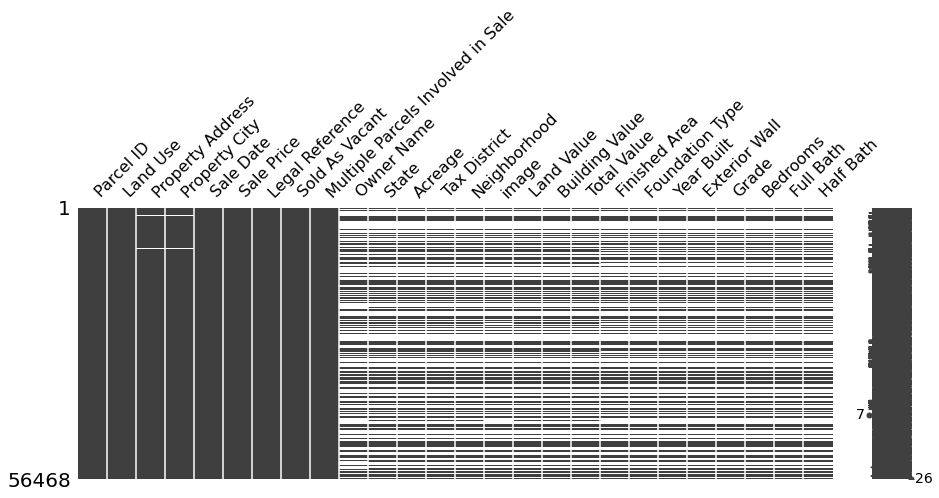

In [42]:
msno.matrix(df, figsize=(15, 5))
plt.show()

161
157


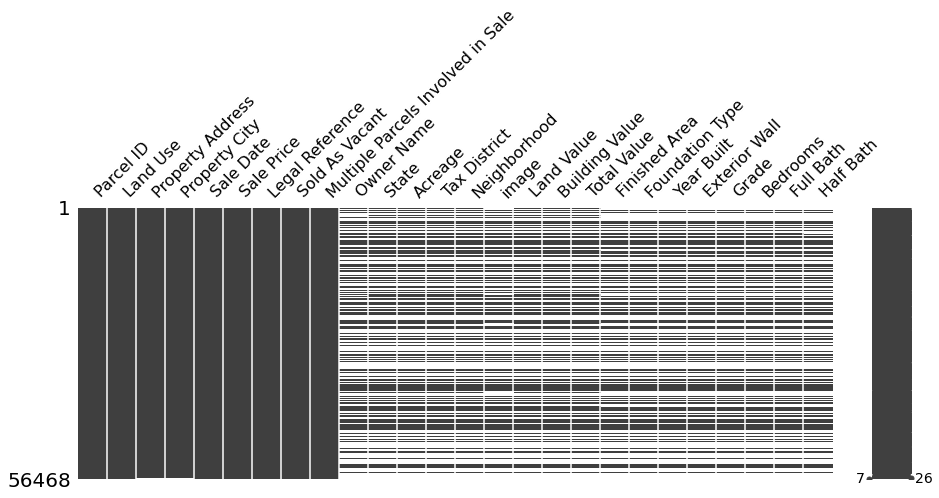

In [51]:
df1 = df.sort_values('Property Address')
print(df['Property Address'].isna().sum())
print(df['Property City'].isna().sum())
msno.matrix(df1, figsize=(15, 5))
plt.show()

We see that there are less than 200 records where property address and/or city are missing. We also see that these correspond with missing values in many other columns. So, we drop this small subset of our data.

0
0


<AxesSubplot:>

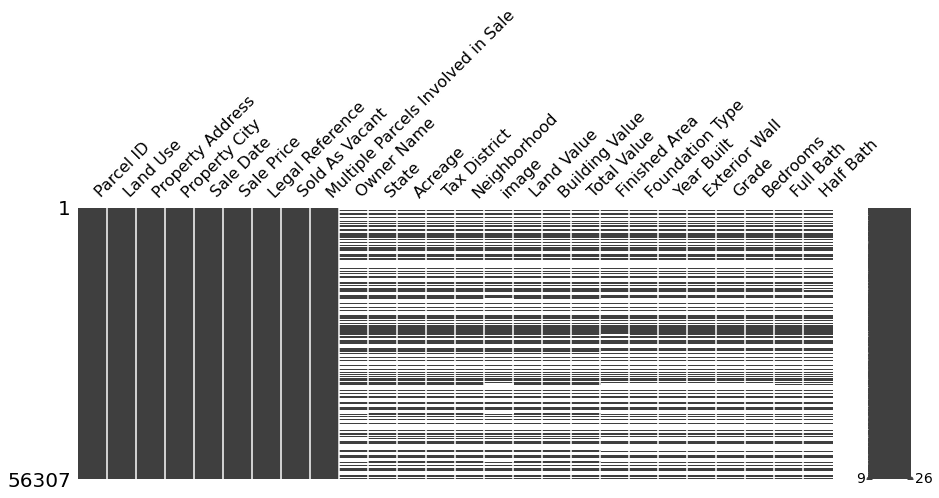

In [59]:
ind = df[df['Property Address'].isna()].index
df = df.drop(ind)
print(df['Property Address'].isna().sum())
print(df['Property City'].isna().sum())
msno.matrix(df, figsize=(15, 5))

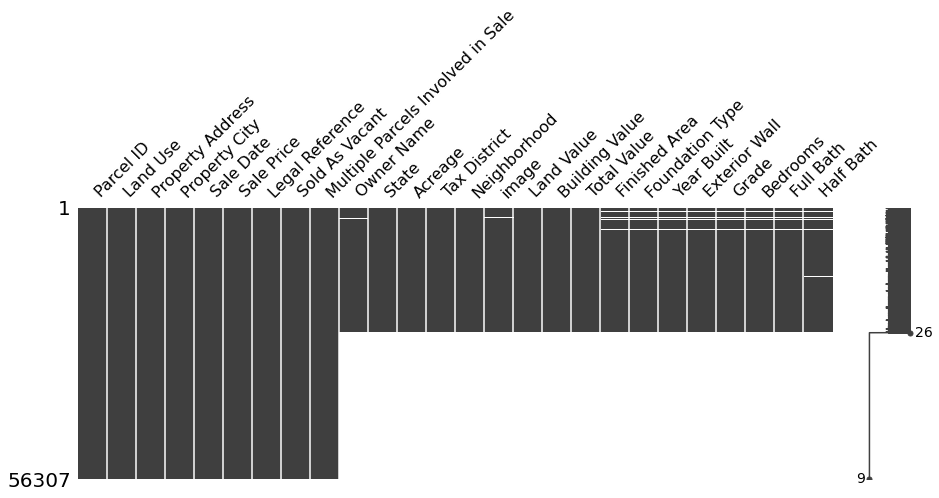

In [60]:
df1 = df.sort_values('Acreage')
msno.matrix(df1, figsize=(15, 5))
plt.show()

We then see that the majority of missing values correspond for different columns. We do not drop the rows with the chunk of missing values for now and leave them for analysis in the next phases. We however pay attention to the missing values that are separate from the chunk of missing values.

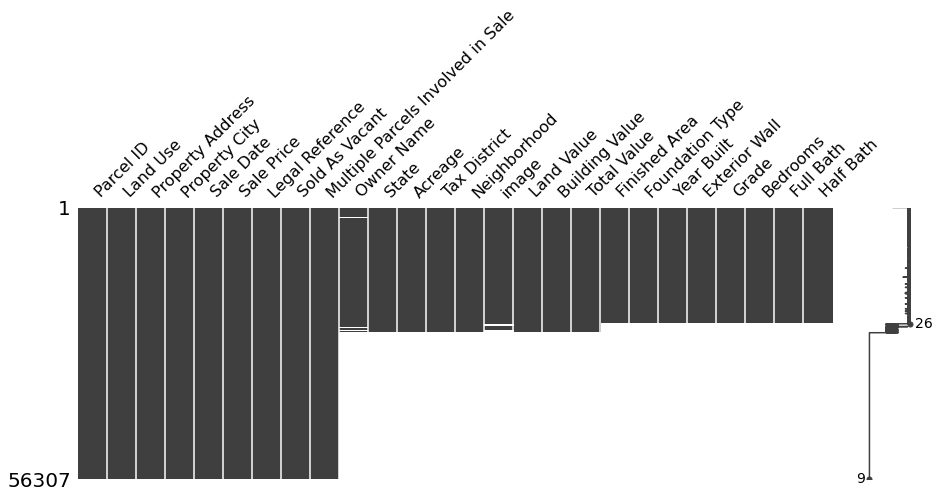

In [69]:
df1 = df.sort_values(['State','Finished Area'])
msno.matrix(df1, figsize=(15, 5))
plt.show()

We see that a considerable portion of rows are missing data on the last 8 columns. We keep these rows as well for further processing and analysis in the next phases. We also see that imagae and Owner Name columns are missing data for some additional rows. These two columns do not contain information that we will use for modeling and it is unlikely that they can help with cleaninig the data at this stage. So we drop these two columns.

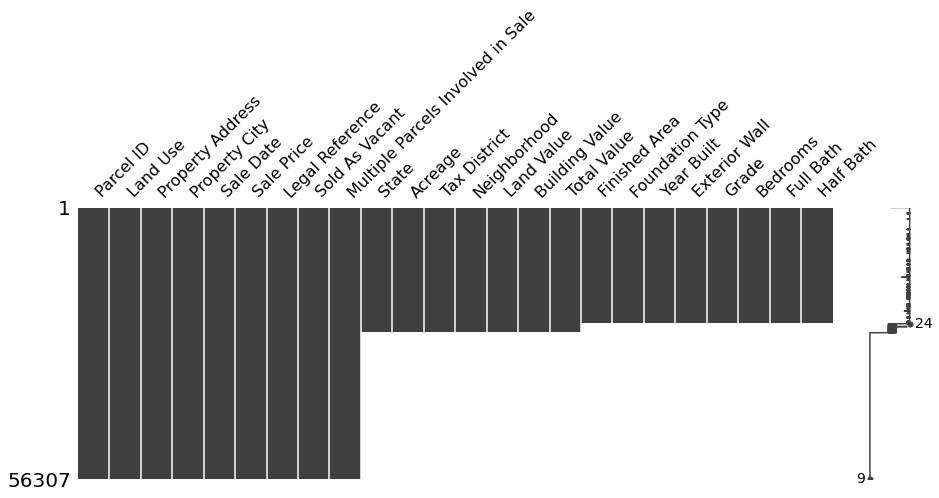

In [71]:
df = df.drop(columns = ['Owner Name', 'image'])
df1 = df.sort_values(['State','Finished Area'])
msno.matrix(df1, figsize=(15, 5))
plt.show()

Next, we analyze numerical and categorical features to see if there are out of range and/or invalid values. Some categorical variables are easy to inspect by just printing their unique values. However, we create another pandas profiling report at this stage and analyze the different categories for each categorical variable. For other variables we plot boxplots to better inspect the values.

In [92]:
#profile_report = df.profile_report(html={'style': {'full_width': True}})
#profile_report.to_file("report2.html")

['RESIDENTIAL CONDO', 'SINGLE FAMILY', 'VACANT RES LAND', 'DUPLEX', 'CONDO', ..., 'TERMINAL/DISTRIBUTION WAREHOUSE', 'NON-PROFIT CHARITABLE SERVICE', 'METRO OTHER THAN OFC, SCHOOL,HOSP, OR PARK', 'NIGHTCLUB/LOUNGE', 'MORTUARY/CEMETERY']
Length: 39
Categories (39, object): ['RESIDENTIAL CONDO', 'SINGLE FAMILY', 'VACANT RES LAND', 'DUPLEX', ..., 'NON-PROFIT CHARITABLE SERVICE', 'METRO OTHER THAN OFC, SCHOOL,HOSP, OR PARK', 'NIGHTCLUB/LOUNGE', 'MORTUARY/CEMETERY']


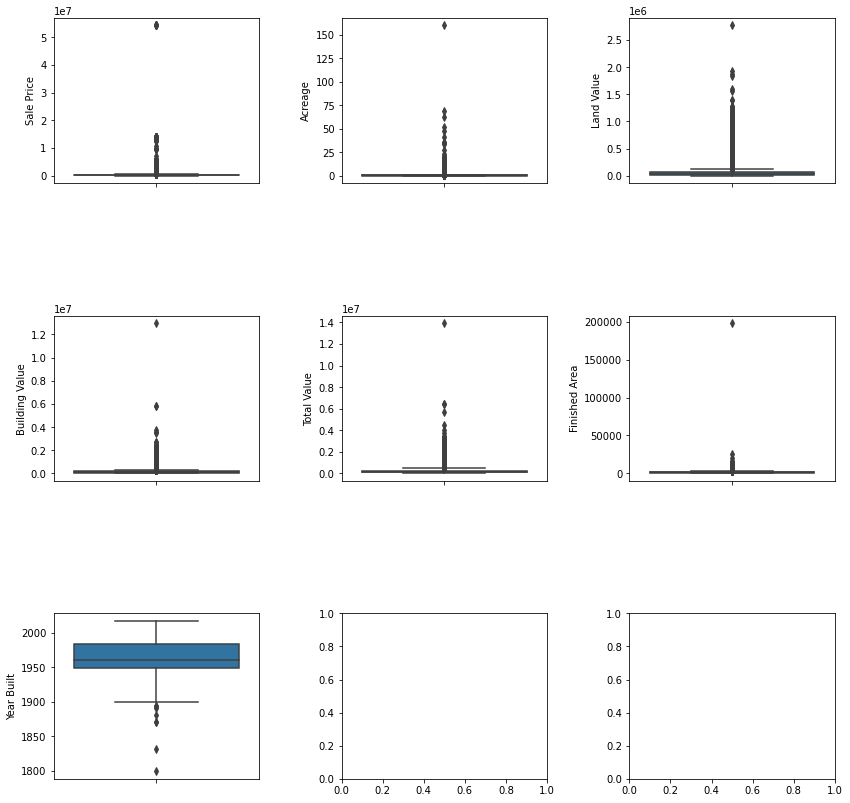

In [97]:
fig, axs = plt.subplots(3,3, figsize=(14, 14))
fig.subplots_adjust(wspace=0.4, hspace=0.8)
i = 0; j = 0
vars = ['Sale Price','Acreage','Land Value','Building Value','Total Value','Finished Area','Year Built']
for var in vars:
    sns.boxplot(ax = axs[i,j], y=var, data=df)
    #axs[i,j].set(title = var, ylabel=var)
    j = j + 1
    if j > 2:
        i = i + 1
        j = 0